In [349]:
from ffnn.healthcheck import healthcheck
healthcheck()

Healthcheck


In [350]:
from ffnn.ffnn import FFNN
from ffnn.types import ActivationFunction, LossFunction, WeightInitializer, WeightsSetup
import numpy as np

In [351]:
# 2 node di input layer, 2 node di hidden layer, 2 node di output layer
layer_sizes = [2, 2, 2]

activation_functions = [
    ActivationFunction.SIGMOID, 
    ActivationFunction.SOFTMAX
]

loss_function = LossFunction.MEAN_SQUARED_ERROR

weights_setup = [
    WeightsSetup(initializer=WeightInitializer.UNIFORM, lower_bound=0, upper_bound=1, seed=1),
    WeightsSetup(initializer=WeightInitializer.NORMAL, mean=0, variance=1, seed=1),
]

model = FFNN(
    layer_sizes=layer_sizes, 
    activation_functions=activation_functions, 
    loss_function=loss_function, 
    weights_setup=weights_setup,
    epochs=2,
    learning_rate=0.5,
    verbose=True,
    random_state=42,
    batch_size=1
)

In [352]:
# Inisialisasi 10 data dummy untuk input dan target
dummy_size = 10
input_data = np.random.uniform(0.01, 0.1, (dummy_size, 2))  # 10 sampel, 2 fitur
target_data = np.random.uniform(0.01, 1.0, (dummy_size, 2))  # 10 sampel, 2 output

# Inisialisasi bobot dan bias
weights = [
    np.random.uniform(0.1, 0.3, (2, 2)),  # Bobot layer pertama (2 input -> 2 hidden)
    np.random.uniform(0.4, 0.6, (2, 2)),  # Bobot layer kedua (2 hidden -> 2 output)
]

biases = [
    np.random.uniform(0.3, 0.4, (2,)),  # Bias layer pertama
    np.random.uniform(0.6, 0.7, (2,)),  # Bias layer kedua
]

# Set bobot dan bias ke model
model.set_weights(weights)
model.set_biases(biases)

In [353]:
model.fit(input_data, target_data)
model.show_graph()

Training...: 100%|██████████| 2/2 [00:00<00:00, 927.02it/s]

Epoch 1 - Training Loss: 0.07364731925199736, Validation Loss: 0.14198689501159587
Epoch 2 - Training Loss: 0.08634168841573645, Validation Loss: 0.09914889959646142


In [354]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import warnings 

In [355]:
warnings.filterwarnings('ignore') 

In [356]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = np.eye(10)[y.astype(int)]

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)
print(X_train.shape, X_test.shape)

(21000, 784) (49000, 784)


In [358]:
# layer_sizes = [784, 256, 128, 10]
# layer_sizes = [784, 50, 10]
layer_sizes = [784, 50, 10]

activation_functions = [
    # ActivationFunction.RELU,
    ActivationFunction.RELU,
    ActivationFunction.SOFTMAX,
]

loss_function = LossFunction.CATEGORICAL_CROSS_ENTROPY

weights_setup = [
    # WeightsSetup(initializer=WeightInitializer.ZERO),
    # WeightsSetup(initializer=WeightInitializer.ZERO),
    WeightsSetup(WeightInitializer.XAVIER, seed=42),
    WeightsSetup(WeightInitializer.XAVIER, seed=42),
    # WeightsSetup(WeightInitializer.XAVIER, seed=42),
    # WeightsSetup(WeightInitializer.NORMAL, mean=0, variance=1, seed=42),
    # WeightsSetup(WeightInitializer.NORMAL, mean=0, variance=1, seed=42),
    # WeightsSetup(WeightInitializer.NORMAL, mean=0, variance=1, seed=42),
    # WeightsSetup(WeightInitializer.UNIFORM, lower_bound=0, upper_bound=1, seed=42),
    # WeightsSetup(WeightInitializer.UNIFORM, lower_bound=0, upper_bound=1, seed=42),
    # WeightsSetup(WeightInitializer.UNIFORM, lower_bound=0, upper_bound=1, seed=42),
]

model = FFNN(
    layer_sizes=layer_sizes, 
    activation_functions=activation_functions, 
    loss_function=loss_function, 
    weights_setup=weights_setup,
    epochs=100,
    verbose=True,
    learning_rate=0.0001,
    batch_size=256,
    random_state=42,
    # l1=0.0001,
    # l2=0.0001,
)

In [359]:
model.fit(X_train, y_train)

Training...:   1%|          | 1/100 [00:00<00:24,  4.00it/s]

Epoch 1 - Training Loss: 23.221022958957608, Validation Loss: 16.0072016838516


Training...:   2%|▏         | 2/100 [00:00<00:26,  3.76it/s]

Epoch 2 - Training Loss: 12.026857222996398, Validation Loss: 9.494631087586642


Training...:   3%|▎         | 3/100 [00:00<00:24,  3.88it/s]

Epoch 3 - Training Loss: 7.922224111341571, Validation Loss: 6.478795803206667


Training...:   4%|▍         | 4/100 [00:00<00:23,  4.11it/s]

Epoch 4 - Training Loss: 5.896659717323518, Validation Loss: 5.59588078081362


Training...:   5%|▌         | 5/100 [00:01<00:22,  4.18it/s]

Epoch 5 - Training Loss: 4.8344247403990055, Validation Loss: 4.650762157561231


Training...:   6%|▌         | 6/100 [00:01<00:21,  4.30it/s]

Epoch 6 - Training Loss: 4.118492269209206, Validation Loss: 3.8881093072166664


Training...:   7%|▋         | 7/100 [00:01<00:21,  4.37it/s]

Epoch 7 - Training Loss: 3.6326558127000705, Validation Loss: 3.205065084658968


Training...:   8%|▊         | 8/100 [00:01<00:20,  4.42it/s]

Epoch 8 - Training Loss: 3.206141154854813, Validation Loss: 2.9245576385202754


Training...:   9%|▉         | 9/100 [00:02<00:20,  4.44it/s]

Epoch 9 - Training Loss: 2.8128512294800316, Validation Loss: 2.8476313867502543


Training...:  10%|█         | 10/100 [00:02<00:19,  4.54it/s]

Epoch 10 - Training Loss: 2.6050254596776243, Validation Loss: 2.3501085335503706


Training...:  11%|█         | 11/100 [00:02<00:19,  4.56it/s]

Epoch 11 - Training Loss: 2.311252515603234, Validation Loss: 2.372479954031636


Training...:  13%|█▎        | 13/100 [00:02<00:18,  4.60it/s]

Epoch 12 - Training Loss: 2.1166843903765855, Validation Loss: 2.1388243697014095
Epoch 13 - Training Loss: 1.9922566669422146, Validation Loss: 1.8313501528614498


Training...:  14%|█▍        | 14/100 [00:03<00:18,  4.70it/s]

Epoch 14 - Training Loss: 1.8040798758559782, Validation Loss: 1.8072952643131919


Training...:  15%|█▌        | 15/100 [00:03<00:19,  4.39it/s]

Epoch 15 - Training Loss: 1.6636932598441476, Validation Loss: 1.670654419605948


Training...:  16%|█▌        | 16/100 [00:03<00:20,  4.04it/s]

Epoch 16 - Training Loss: 1.5675469516998441, Validation Loss: 1.4873762569515063


Training...:  17%|█▋        | 17/100 [00:04<00:21,  3.92it/s]

Epoch 17 - Training Loss: 1.4548670597221707, Validation Loss: 1.3932316724848761


Training...:  18%|█▊        | 18/100 [00:04<00:20,  4.03it/s]

Epoch 18 - Training Loss: 1.3725595432557651, Validation Loss: 1.3274075215151224


Training...:  19%|█▉        | 19/100 [00:04<00:19,  4.12it/s]

Epoch 19 - Training Loss: 1.2743863074409774, Validation Loss: 1.2899729777041071


Training...:  20%|██        | 20/100 [00:04<00:19,  4.12it/s]

Epoch 20 - Training Loss: 1.1977720285131241, Validation Loss: 1.2779441296408396


Training...:  21%|██        | 21/100 [00:04<00:18,  4.24it/s]

Epoch 21 - Training Loss: 1.1545207808833604, Validation Loss: 1.1516698820940103


Training...:  22%|██▏       | 22/100 [00:05<00:18,  4.31it/s]

Epoch 22 - Training Loss: 1.0913282412873129, Validation Loss: 1.136520081615501


Training...:  23%|██▎       | 23/100 [00:05<00:18,  4.22it/s]

Epoch 23 - Training Loss: 1.0512467637177052, Validation Loss: 1.01712774825527


Training...:  24%|██▍       | 24/100 [00:05<00:17,  4.29it/s]

Epoch 24 - Training Loss: 1.0035345575528296, Validation Loss: 0.9754661717098781


Training...:  25%|██▌       | 25/100 [00:05<00:17,  4.28it/s]

Epoch 25 - Training Loss: 0.9489066406651715, Validation Loss: 0.9875308342727582


Training...:  26%|██▌       | 26/100 [00:06<00:17,  4.35it/s]

Epoch 26 - Training Loss: 0.9236365770843681, Validation Loss: 0.8939904969154981


Training...:  27%|██▋       | 27/100 [00:06<00:16,  4.40it/s]

Epoch 27 - Training Loss: 0.8752848974865548, Validation Loss: 0.9173659472327512


Training...:  28%|██▊       | 28/100 [00:06<00:16,  4.36it/s]

Epoch 28 - Training Loss: 0.8396585125912797, Validation Loss: 0.8845179878752966


Training...:  29%|██▉       | 29/100 [00:06<00:16,  4.42it/s]

Epoch 29 - Training Loss: 0.8257215572316832, Validation Loss: 0.8051978140723489


Training...:  30%|███       | 30/100 [00:06<00:15,  4.44it/s]

Epoch 30 - Training Loss: 0.800009187640775, Validation Loss: 0.7537179531021869


Training...:  31%|███       | 31/100 [00:07<00:16,  4.30it/s]

Epoch 31 - Training Loss: 0.7582352557014236, Validation Loss: 0.7770128258144438


Training...:  32%|███▏      | 32/100 [00:07<00:16,  4.20it/s]

Epoch 32 - Training Loss: 0.7356577934500733, Validation Loss: 0.7338845349661927


Training...:  33%|███▎      | 33/100 [00:07<00:16,  4.06it/s]

Epoch 33 - Training Loss: 0.6904727711442594, Validation Loss: 0.8097823434633782


Training...:  34%|███▍      | 34/100 [00:08<00:16,  3.92it/s]

Epoch 34 - Training Loss: 0.7133655763289358, Validation Loss: 0.6337542376397476


Training...:  35%|███▌      | 35/100 [00:08<00:16,  4.04it/s]

Epoch 35 - Training Loss: 0.6748648507587719, Validation Loss: 0.6641200320851536


Training...:  36%|███▌      | 36/100 [00:08<00:15,  4.11it/s]

Epoch 36 - Training Loss: 0.6722055397423625, Validation Loss: 0.5520856446948519


Training...:  37%|███▋      | 37/100 [00:08<00:14,  4.25it/s]

Epoch 37 - Training Loss: 0.6506583377489795, Validation Loss: 0.5689989058981323


Training...:  38%|███▊      | 38/100 [00:08<00:15,  3.92it/s]

Epoch 38 - Training Loss: 0.6110156613589601, Validation Loss: 0.632245661625411


Training...:  39%|███▉      | 39/100 [00:09<00:15,  4.04it/s]

Epoch 39 - Training Loss: 0.5808557416693312, Validation Loss: 0.6635929432238958


Training...:  40%|████      | 40/100 [00:09<00:14,  4.01it/s]

Epoch 40 - Training Loss: 0.585974819827923, Validation Loss: 0.5643586260417597


Training...:  41%|████      | 41/100 [00:09<00:15,  3.85it/s]

Epoch 41 - Training Loss: 0.5477713881916171, Validation Loss: 0.6440291662407525


Training...:  42%|████▏     | 42/100 [00:10<00:14,  3.87it/s]

Epoch 42 - Training Loss: 0.557472012271788, Validation Loss: 0.5263637640241567


Training...:  43%|████▎     | 43/100 [00:10<00:14,  3.99it/s]

Epoch 43 - Training Loss: 0.5277318537402942, Validation Loss: 0.5747771220986319


Training...:  44%|████▍     | 44/100 [00:10<00:13,  4.09it/s]

Epoch 44 - Training Loss: 0.5259202740268144, Validation Loss: 0.533403273769917


Training...:  45%|████▌     | 45/100 [00:10<00:13,  4.14it/s]

Epoch 45 - Training Loss: 0.5121802683534985, Validation Loss: 0.5189382508280317


Training...:  46%|████▌     | 46/100 [00:10<00:12,  4.25it/s]

Epoch 46 - Training Loss: 0.5024739879438835, Validation Loss: 0.5007954046338668


Training...:  47%|████▋     | 47/100 [00:11<00:12,  4.30it/s]

Epoch 47 - Training Loss: 0.48862324770634163, Validation Loss: 0.5010789452106006


Training...:  48%|████▊     | 48/100 [00:11<00:12,  4.16it/s]

Epoch 48 - Training Loss: 0.47589194552614067, Validation Loss: 0.47913749398873956


Training...:  49%|████▉     | 49/100 [00:11<00:12,  3.97it/s]

Epoch 49 - Training Loss: 0.4721280006247122, Validation Loss: 0.4644519784563335


Training...:  50%|█████     | 50/100 [00:11<00:13,  3.84it/s]

Epoch 50 - Training Loss: 0.46728185267998124, Validation Loss: 0.4209731171047727


Training...:  51%|█████     | 51/100 [00:12<00:12,  3.86it/s]

Epoch 51 - Training Loss: 0.44879920562001335, Validation Loss: 0.445674197618438


Training...:  52%|█████▏    | 52/100 [00:12<00:12,  3.72it/s]

Epoch 52 - Training Loss: 0.44566183156565714, Validation Loss: 0.42292378324514596


Training...:  53%|█████▎    | 53/100 [00:12<00:12,  3.68it/s]

Epoch 53 - Training Loss: 0.4227326795220403, Validation Loss: 0.47608997539298864


Training...:  54%|█████▍    | 54/100 [00:13<00:12,  3.72it/s]

Epoch 54 - Training Loss: 0.429222499124806, Validation Loss: 0.40837501592080866


Training...:  55%|█████▌    | 55/100 [00:13<00:11,  3.95it/s]

Epoch 55 - Training Loss: 0.40068371080241333, Validation Loss: 0.48937991506250444


Training...:  56%|█████▌    | 56/100 [00:13<00:10,  4.12it/s]

Epoch 56 - Training Loss: 0.42431705715719487, Validation Loss: 0.34073955771885295


Training...:  57%|█████▋    | 57/100 [00:13<00:10,  4.23it/s]

Epoch 57 - Training Loss: 0.4050967759290778, Validation Loss: 0.3902888839543509


Training...:  58%|█████▊    | 58/100 [00:13<00:09,  4.34it/s]

Epoch 58 - Training Loss: 0.3922884346279618, Validation Loss: 0.402282178981823


Training...:  59%|█████▉    | 59/100 [00:14<00:09,  4.40it/s]

Epoch 59 - Training Loss: 0.3927140470937869, Validation Loss: 0.36745879638344386


Training...:  60%|██████    | 60/100 [00:14<00:09,  4.40it/s]

Epoch 60 - Training Loss: 0.39812338950631493, Validation Loss: 0.3179651707472328


Training...:  61%|██████    | 61/100 [00:14<00:09,  4.33it/s]

Epoch 61 - Training Loss: 0.37986392866244056, Validation Loss: 0.3447641976681765


Training...:  62%|██████▏   | 62/100 [00:14<00:08,  4.40it/s]

Epoch 62 - Training Loss: 0.36280337326574763, Validation Loss: 0.37391490603005734


Training...:  63%|██████▎   | 63/100 [00:15<00:08,  4.24it/s]

Epoch 63 - Training Loss: 0.36615258006320506, Validation Loss: 0.3452375044738293


Training...:  64%|██████▍   | 64/100 [00:15<00:08,  4.21it/s]

Epoch 64 - Training Loss: 0.3718833290727214, Validation Loss: 0.29670262724586177


Training...:  65%|██████▌   | 65/100 [00:15<00:08,  3.91it/s]

Epoch 65 - Training Loss: 0.344186658155337, Validation Loss: 0.37211200912379816


Training...:  66%|██████▌   | 66/100 [00:15<00:08,  3.79it/s]

Epoch 66 - Training Loss: 0.35070425502013314, Validation Loss: 0.334557803243424


Training...:  67%|██████▋   | 67/100 [00:16<00:08,  3.87it/s]

Epoch 67 - Training Loss: 0.3378084412689839, Validation Loss: 0.33656043611408254


Training...:  68%|██████▊   | 68/100 [00:16<00:08,  3.85it/s]

Epoch 68 - Training Loss: 0.338406237126737, Validation Loss: 0.3160919239590779


Training...:  69%|██████▉   | 69/100 [00:16<00:08,  3.73it/s]

Epoch 69 - Training Loss: 0.3277290382966523, Validation Loss: 0.3365722949486248


Training...:  70%|███████   | 70/100 [00:17<00:08,  3.68it/s]

Epoch 70 - Training Loss: 0.31670671755820023, Validation Loss: 0.3506592071501129


Training...:  71%|███████   | 71/100 [00:17<00:07,  3.83it/s]

Epoch 71 - Training Loss: 0.3173079048594802, Validation Loss: 0.31819221096621925


Training...:  72%|███████▏  | 72/100 [00:17<00:07,  3.89it/s]

Epoch 72 - Training Loss: 0.3114539245393467, Validation Loss: 0.3151982055331866


Training...:  73%|███████▎  | 73/100 [00:17<00:06,  3.99it/s]

Epoch 73 - Training Loss: 0.3070282232496206, Validation Loss: 0.3103031177150263


Training...:  74%|███████▍  | 74/100 [00:17<00:06,  4.02it/s]

Epoch 74 - Training Loss: 0.30069891508047597, Validation Loss: 0.3153275802116089


Training...:  75%|███████▌  | 75/100 [00:18<00:06,  4.07it/s]

Epoch 75 - Training Loss: 0.29263080095126204, Validation Loss: 0.3360353692806557


Training...:  76%|███████▌  | 76/100 [00:18<00:06,  3.96it/s]

Epoch 76 - Training Loss: 0.2866446872364432, Validation Loss: 0.343921896076974


Training...:  77%|███████▋  | 77/100 [00:18<00:05,  3.95it/s]

Epoch 77 - Training Loss: 0.28787277611019446, Validation Loss: 0.31364070162426855


Training...:  78%|███████▊  | 78/100 [00:18<00:05,  3.90it/s]

Epoch 78 - Training Loss: 0.28745434814318993, Validation Loss: 0.2924855248044745


Training...:  79%|███████▉  | 79/100 [00:19<00:05,  3.94it/s]

Epoch 79 - Training Loss: 0.28998145163911815, Validation Loss: 0.252773057921544


Training...:  80%|████████  | 80/100 [00:19<00:05,  3.96it/s]

Epoch 80 - Training Loss: 0.28378834187892876, Validation Loss: 0.2747424780306979


Training...:  81%|████████  | 81/100 [00:19<00:04,  4.10it/s]

Epoch 81 - Training Loss: 0.2752579549010076, Validation Loss: 0.2875984090704886


Training...:  82%|████████▏ | 82/100 [00:19<00:04,  3.91it/s]

Epoch 82 - Training Loss: 0.2583288982978475, Validation Loss: 0.34271979466521135


Training...:  83%|████████▎ | 83/100 [00:20<00:04,  3.86it/s]

Epoch 83 - Training Loss: 0.27377464956072467, Validation Loss: 0.23649764459932784


Training...:  84%|████████▍ | 84/100 [00:20<00:04,  3.99it/s]

Epoch 84 - Training Loss: 0.26053049801630135, Validation Loss: 0.2812219602540483


Training...:  85%|████████▌ | 85/100 [00:20<00:03,  4.01it/s]

Epoch 85 - Training Loss: 0.26648401755269474, Validation Loss: 0.25880015210260576


Training...:  86%|████████▌ | 86/100 [00:21<00:03,  3.86it/s]

Epoch 86 - Training Loss: 0.24809522282949592, Validation Loss: 0.3091103691392157


Training...:  87%|████████▋ | 87/100 [00:21<00:03,  3.78it/s]

Epoch 87 - Training Loss: 0.26291685886404853, Validation Loss: 0.23611892761803227


Training...:  88%|████████▊ | 88/100 [00:21<00:03,  3.78it/s]

Epoch 88 - Training Loss: 0.250079353179356, Validation Loss: 0.2585925480316129


Training...:  89%|████████▉ | 89/100 [00:21<00:03,  3.61it/s]

Epoch 89 - Training Loss: 0.250356218866952, Validation Loss: 0.26706654873934854


Training...:  90%|█████████ | 90/100 [00:22<00:02,  3.55it/s]

Epoch 90 - Training Loss: 0.24359135206233803, Validation Loss: 0.28047374617893617


Training...:  91%|█████████ | 91/100 [00:22<00:02,  3.60it/s]

Epoch 91 - Training Loss: 0.23511865540105104, Validation Loss: 0.28547670424713184


Training...:  92%|█████████▏| 92/100 [00:22<00:02,  3.56it/s]

Epoch 92 - Training Loss: 0.24687169008731752, Validation Loss: 0.2312451680114523


Training...:  93%|█████████▎| 93/100 [00:22<00:01,  3.71it/s]

Epoch 93 - Training Loss: 0.2432779012064443, Validation Loss: 0.22641592262698715


Training...:  94%|█████████▍| 94/100 [00:23<00:01,  3.90it/s]

Epoch 94 - Training Loss: 0.2380435019117366, Validation Loss: 0.22895340453280638


Training...:  95%|█████████▌| 95/100 [00:23<00:01,  3.98it/s]

Epoch 95 - Training Loss: 0.23875934490941628, Validation Loss: 0.2150466002234448


Training...:  96%|█████████▌| 96/100 [00:23<00:01,  3.95it/s]

Epoch 96 - Training Loss: 0.22786766126742902, Validation Loss: 0.24071917159628156


Training...:  97%|█████████▋| 97/100 [00:23<00:00,  3.95it/s]

Epoch 97 - Training Loss: 0.2309946782558585, Validation Loss: 0.2197282314381602


Training...:  98%|█████████▊| 98/100 [00:24<00:00,  4.11it/s]

Epoch 98 - Training Loss: 0.22141769660888183, Validation Loss: 0.25030385785179715


Training...:  99%|█████████▉| 99/100 [00:24<00:00,  4.14it/s]

Epoch 99 - Training Loss: 0.2290010259272571, Validation Loss: 0.18695369871854464


Training...: 100%|██████████| 100/100 [00:24<00:00,  4.06it/s]

Epoch 100 - Training Loss: 0.22273040494650606, Validation Loss: 0.22176651843255993


In [360]:
y_pred = model.predict(X_test)
y_true = y_test

accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.35%


In [361]:
import pandas as pd

In [362]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9
0,8.222513e-01,1.539402e-13,1.188949e-08,6.125788e-24,3.223556e-10,1.476517e-01,2.888691e-02,1.209293e-03,6.971638e-07,1.006013e-08
1,1.573039e-65,1.235523e-55,1.321281e-26,6.687254e-31,1.000000e+00,9.430149e-19,1.317725e-37,4.616133e-39,5.450107e-41,4.092363e-18
2,1.535374e-18,1.000000e+00,4.052694e-25,8.526775e-18,5.529382e-16,1.676120e-21,1.405576e-28,8.657652e-25,1.382687e-14,2.911323e-21
3,2.355659e-14,1.304629e-37,1.000000e+00,1.448526e-15,1.760457e-41,2.238396e-15,1.870909e-27,1.007281e-30,1.251626e-18,7.460827e-27
4,4.925331e-44,5.346738e-28,1.635378e-23,9.648874e-34,1.000000e+00,3.148691e-19,2.920490e-21,3.572167e-15,4.933033e-40,3.633827e-16


In [363]:
y_true_df = pd.DataFrame(y_true)
y_true_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


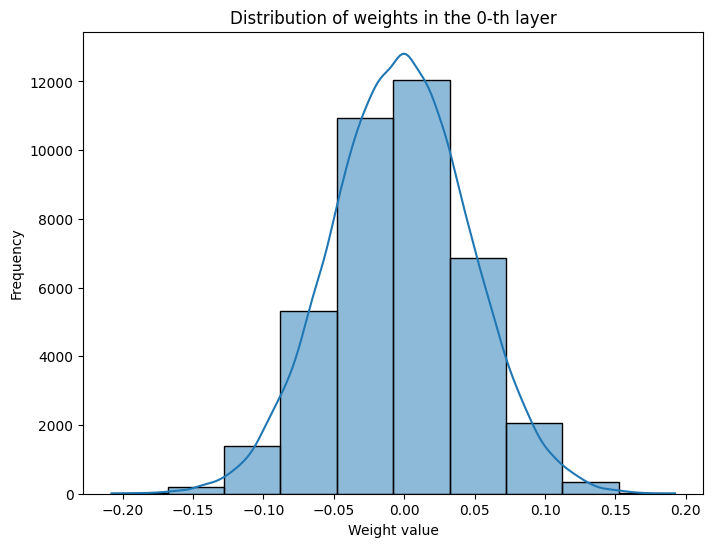

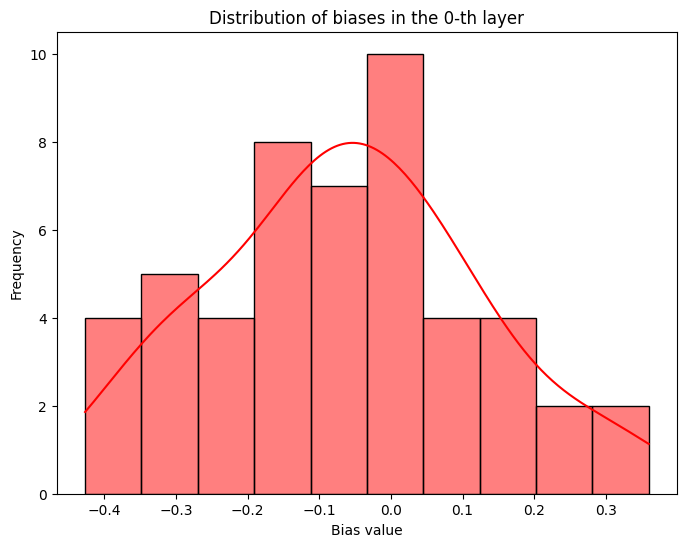

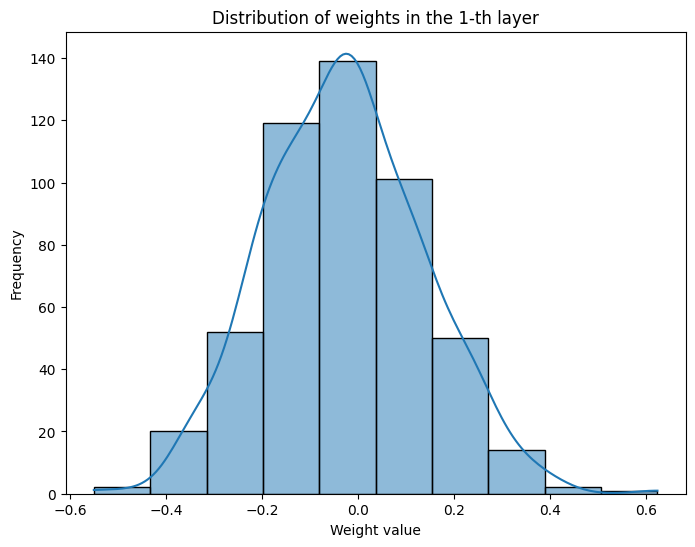

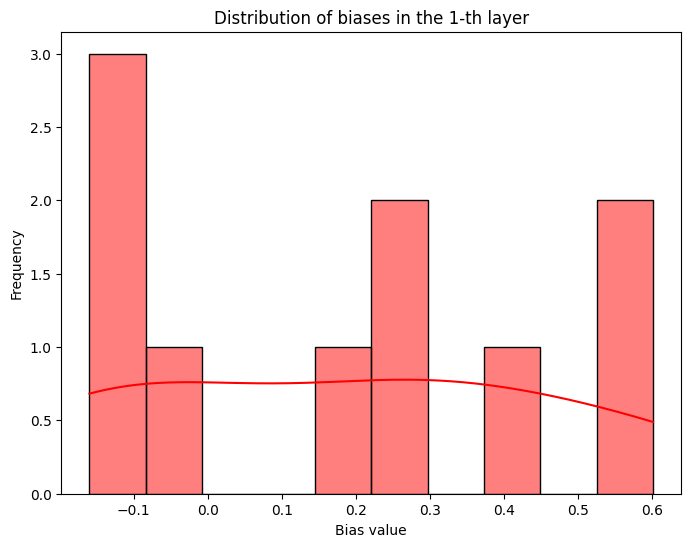

In [364]:
model.plot_weights([i for i in range(len(layer_sizes) - 1)])

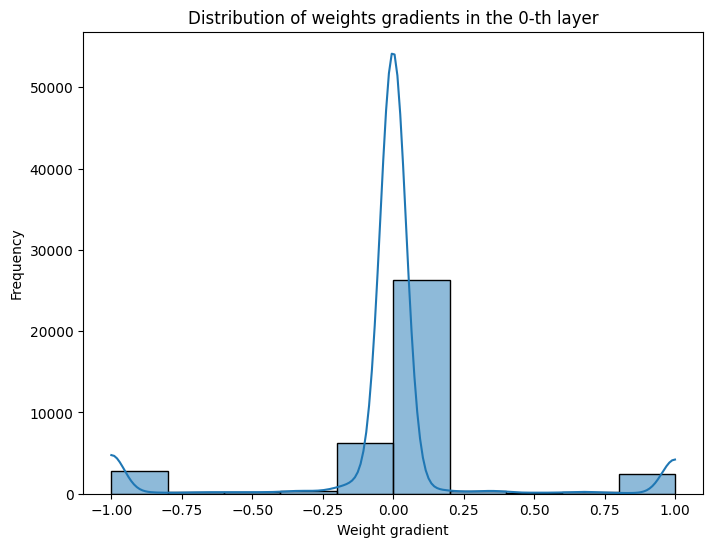

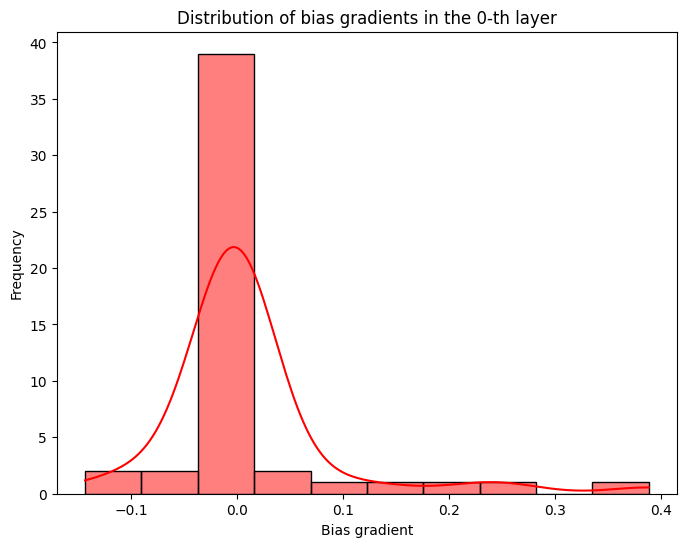

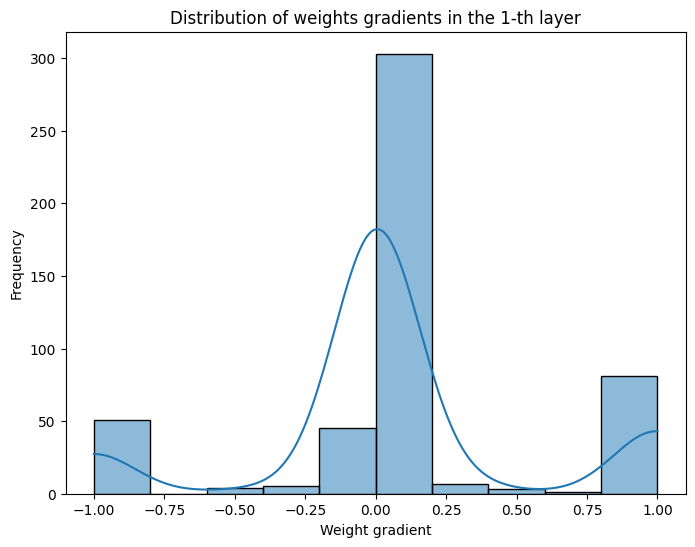

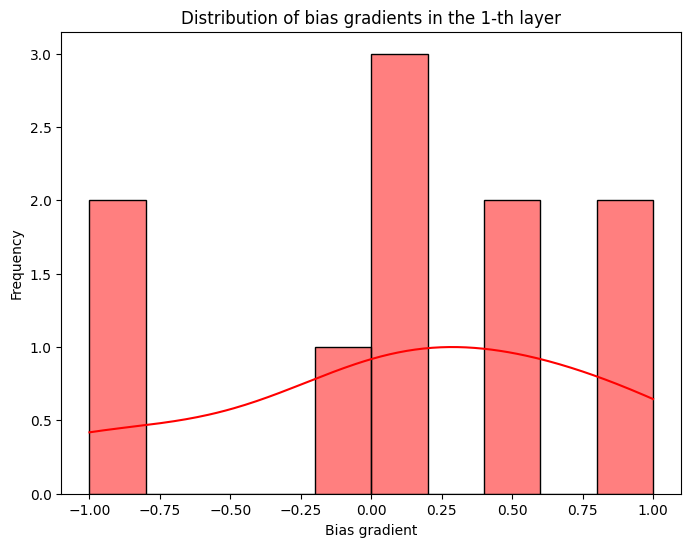

In [365]:
model.plot_gradients([i for i in range(len(layer_sizes) - 1)])

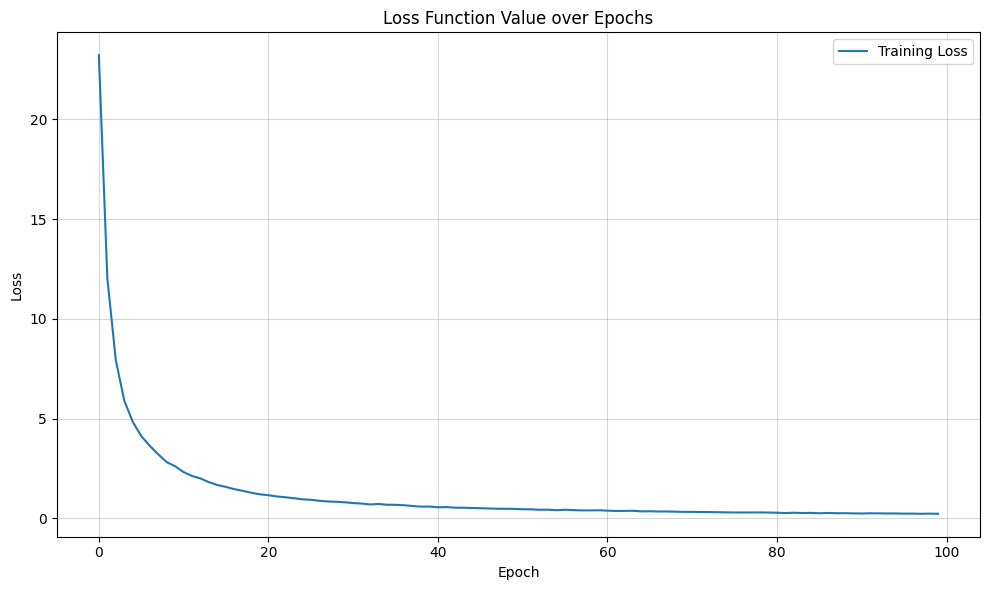

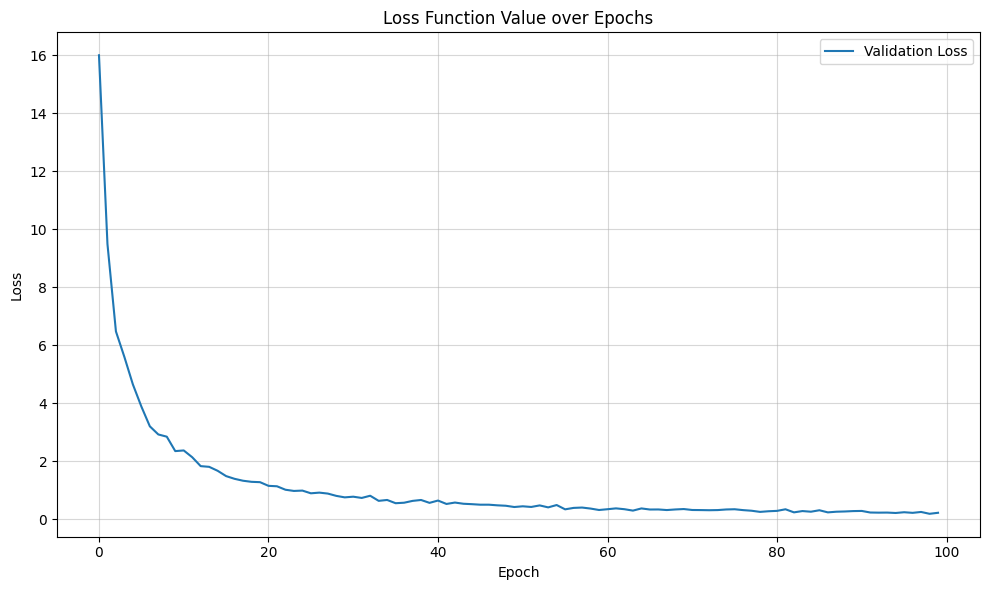

In [366]:
model.plot_loss_curve()

In [367]:
model.save_model("../../models/ffnn_model.pkl")

In [368]:
load = FFNN.load_model("../../models/ffnn_model.pkl")
y_pred = load.predict(X_test)
y_true = y_test

accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.35%
